In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("admission_predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


**Data Understanding**

In [3]:
df.shape

(500, 9)

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.rename(columns={"GRE Score":"GRE", "TOEFL Score": "TOEFL", "LOR ": "LOR", "Chance of Admit ":"Probability"})
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Data Visualization**

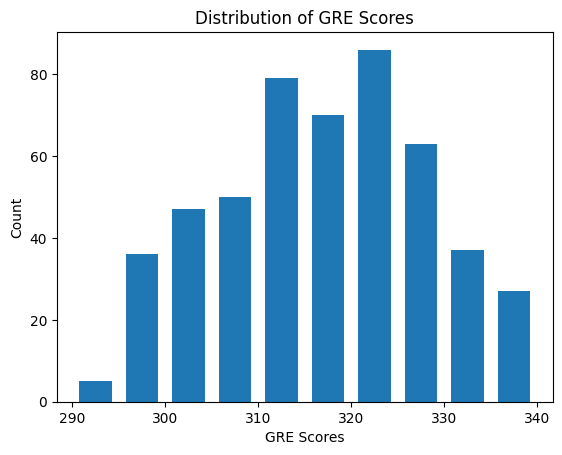

In [11]:
# Visualizing the feature GRE
fig = plt.hist(df["GRE"], rwidth=0.7)
plt.title("Distribution of GRE Scores")
plt.xlabel("GRE Scores")
plt.ylabel("Count")
plt.show()

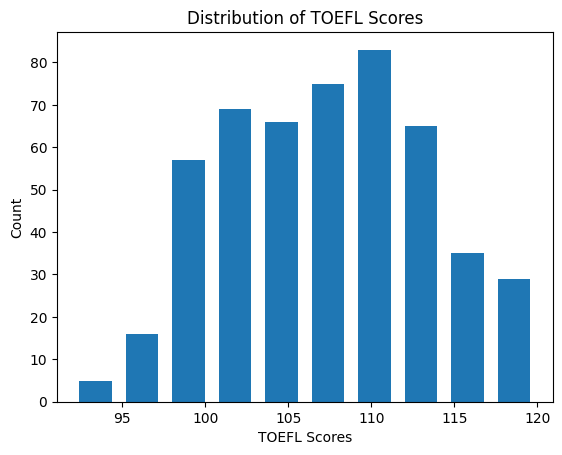

In [12]:
# Visualizing the feature TOEFL
fig = plt.hist(df["TOEFL"], rwidth=0.7)
plt.title("Distribution of TOEFL Scores")
plt.xlabel("TOEFL Scores")
plt.ylabel("Count")
plt.show()

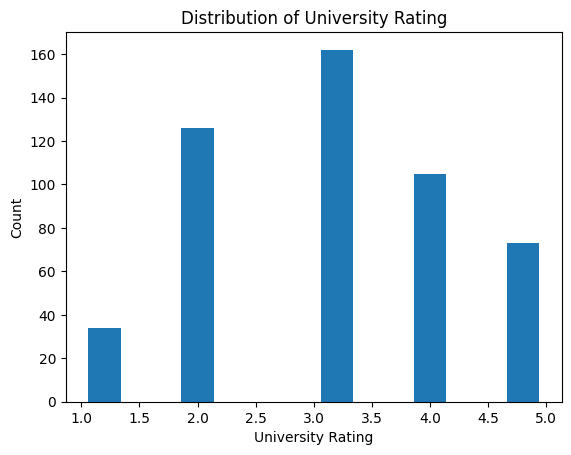

In [13]:
# Visualizing the feature University rating
fig = plt.hist(df["University Rating"], rwidth=0.7)
plt.title("Distribution of University Rating")
plt.xlabel("University Rating")
plt.ylabel("Count")
plt.show()

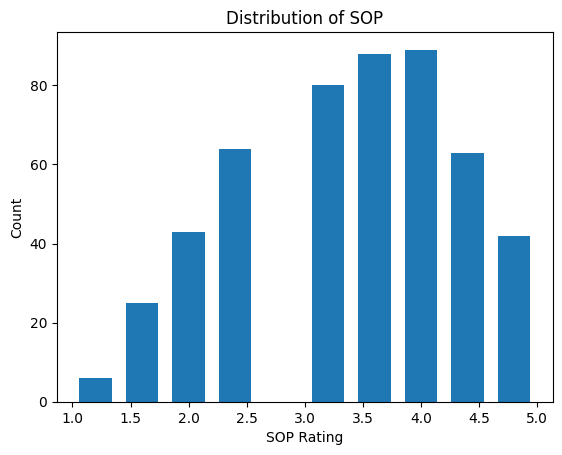

In [14]:
# Visualizing the feature SOP
fig = plt.hist(df["SOP"], rwidth=0.7)
plt.title("Distribution of SOP")
plt.xlabel("SOP Rating")
plt.ylabel("Count")
plt.show()

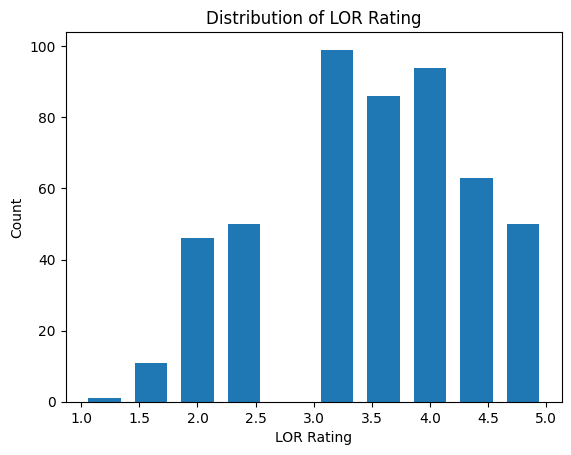

In [15]:
# Visualizing the feature LOR
fig = plt.hist(df["LOR"], rwidth=0.7)
plt.title("Distribution of LOR Rating")
plt.xlabel("LOR Rating")
plt.ylabel("Count")
plt.show()

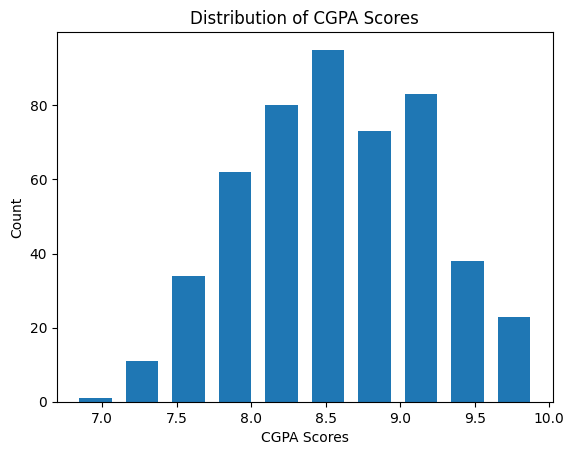

In [16]:
# Visualizing the feature CGPA
fig = plt.hist(df["CGPA"], rwidth=0.7)
plt.title("Distribution of CGPA Scores")
plt.xlabel("CGPA Scores")
plt.ylabel("Count")
plt.show()

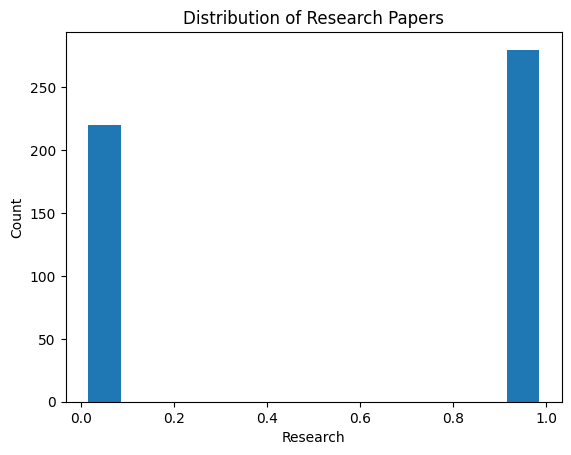

In [17]:
# Visualizing the feature Research
fig = plt.hist(df["Research"], rwidth=0.7)
plt.title("Distribution of Research Papers")
plt.xlabel("Research")
plt.ylabel("Count")
plt.show()

In [18]:
df.drop("Serial No.", axis="columns",inplace=True)
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
df_copy = df.copy(deep=True)
df_copy[["GRE","TOEFL","University Rating","SOP","LOR","CGPA"]]= df_copy[["GRE","TOEFL","University Rating","SOP","LOR","CGPA"]].replace(0,np.NaN)
df_copy.isnull().sum()

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

In [20]:
X = df_copy.drop("Probability",axis='columns')
y = df_copy["Probability"]

**Data Modelling**

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

def find_best_model(X_train, y_train):
    models = {
        "Linear Regression": {
            "model": LinearRegression(),
            "parameters": {
                "fit_intercept": [True, False]
            }
        },
        "Lasso Regression": {
            "model": Lasso(),
            "parameters": {
                "alpha": [0.01, 0.1, 1, 10],
                "selection": ["random", "cyclic"]
            }
        },
        "Support Vector Regressor (SVR)": {
            "model": SVR(),
            "parameters": {
                "kernel": ["linear", "rbf"],
                "C": [0.1, 1, 10]
            }
        },
        "Decision Tree Regressor": {
            "model": DecisionTreeRegressor(),
            "parameters": {
                "criterion": ["squared_error", "absolute_error"],
                "max_depth": [None, 10, 20]
            }
        },
        "Random Forest Regressor": {
            "model": RandomForestRegressor(),
            "parameters": {
                "n_estimators": [10, 50, 100],
                "criterion": ["squared_error", "absolute_error"]
            }
        },
        "K-Nearest Neighbors Regressor": {
            "model": KNeighborsRegressor(),
            "parameters": {
                "n_neighbors": [3, 5, 10],
                "weights": ["uniform", "distance"]
            }
        }
    }

    results = []

    for name, mp in models.items():
        grid_search = GridSearchCV(mp["model"], mp["parameters"], cv=5, scoring="r2")
        grid_search.fit(X_train, y_train)

        results.append({
            "model": name,
            "best_parameters": grid_search.best_params_,
            "score": grid_search.best_score_
        })

    return pd.DataFrame(results, columns=["model", "best_parameters", "score"]).sort_values(by="score", ascending=False)

# Example Usage:
# best_models_df = find_best_model(X_train, y_train)
# print(best_models_df)

In [22]:
find_best_model(X,y)

,model,best_parameters,score
0,Linear Regression,{'fit_intercept': True},0.810802
4,Random Forest Regressor,"{'criterion': 'absolute_error', 'n_estimators'...",0.789982
2,Support Vector Regressor (SVR),"{'C': 1, 'kernel': 'linear'}",0.782363
1,Lasso Regression,"{'alpha': 0.01, 'selection': 'cyclic'}",0.749343
5,K-Nearest Neighbors Regressor,"{'n_neighbors': 10, 'weights': 'distance'}",0.711790
3,Decision Tree Regressor,"{'criterion': 'absolute_error', 'max_depth': 10}",0.657497


**Since the Linear Regression Algorithm Has the Highest Accuracy, the Model Selected for this Problem is Linear Regression**

In [23]:
# Using the cross_val_scores for gaining highest accuracy
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Perform cross-validation
scores = cross_val_score(LinearRegression(), X, y, cv=5)

# Print the highest accuracy
print("Highest Accuracy: {}%".format(round(sum(scores) * 100 / len(scores), 3)))

Highest Accuracy: 81.08%


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Lists to store training and CV scores
Train = []
CV = []

# Loop over different random states
for i in range(0, 100):
    # Split the data using the current random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Calculate and store the training score
    train_score = model.score(X_train, y_train)
    Train.append(train_score)
    
    # Calculate and store the cross-validation score
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    CV.append(cv_score)

# Create a DataFrame to compare training and CV scores
em = pd.DataFrame({"Train": Train, "CV": CV})

# Filter rows where the difference between Train and CV scores is less than or equal to 0.05
gm = em[abs(em["Train"] - em["CV"]) <= 0.05]

# Find the index of the maximum CV score in the filtered DataFrame
rs = gm[gm["CV"] == gm["CV"].max()].index.tolist()[0]

# Output the best random state
print("Best random state number:", rs)

Best random state number: 63


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=63)
print(len(X_train),len(X_test))

400 100


In [26]:
#modelling
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print("Coefficients:",model.coef_)
print("intercept:",model.intercept_)

Coefficients: [0.00229848 0.0025259  0.00246654 0.00436219 0.01813248 0.11032435
 0.02512465]
intercept: -1.319460016234692


In [27]:
# prediction on train data 
ypred_train = model.predict(X_train)

In [28]:
# prediction on test data 
ypred_test = model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))
from sklearn.model_selection import cross_val_score
print("CV Score R2:",cross_val_score(model,X_train,y_train,cv=5,scoring="r2").mean())
from sklearn.metrics import r2_score
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.8467106188151237
CV Score R2: 0.834102218830868
Test R2: 0.7351011929758544


**Predicting the Values Using Our Trained Model**

In [30]:
df_copy.columns

Index(['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Probability'],
      dtype='object')

In [31]:
# Prediction 1
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research, Probability
print("Chance of getting Admission is {}%".format(round(model.predict([[320,113,2,2.0,2.5,8.64,1]])[0]*100,3)))

Chance of getting Admission is 73.88%


In [32]:
# Prediction 2
# Input in the form : GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research, Probability
print("Chance of getting Admission is {}%".format(round(model.predict([[337,118,4,4.5,4.5,9.65,0]])[0]*100,3)))

Chance of getting Admission is 92.891%
